In [5]:
import pandas as pd

In [20]:
## Using parse_dates so that panda recongnize Date column as date not as string.
df =pd.read_csv('daily-total-female-births-ca.csv',header = 0,parse_dates=[0])

In [7]:
df.head()

,Date,Daily total births in California 1959
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [21]:
df.dtypes

Date                                     datetime64[ns]
Daily total births in California 1959             int64
dtype: object

# Loading data as a series

In [6]:
series = pd.read_csv('daily-total-female-births-ca.csv',header=0 ,parse_dates=[0],index_col = [0],squeeze = True)

In [ ]:
## index_col = 0 here because we are making date as index column.

In [7]:
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total births in California 1959, dtype: int64

In [8]:
series.shape

(365,)

In [9]:
df.shape

(365, 2)

In [10]:
print(series['1959-01'])

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Daily total births in California 1959, dtype: int64


In [11]:
print(series['1959'])

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Daily total births in California 1959, Length: 365, dtype: int64


In [12]:
df[(df['Date'] >= '1959-01-01') & (df['Date'] <= '1959-01-31')]

,Date,Daily total births in California 1959
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [13]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Daily total births in California 1959, dtype: float64

In [14]:
df.describe()

,Daily total births in California 1959
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Date time Features

In [15]:
features = df.copy()

In [16]:
features['year'] = df['Date'].dt.year
features['month'] = df['Date'].dt.month
features['day'] = df['Date'].dt.day

In [17]:
features.head()

,Date,Daily total births in California 1959,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


# Lag Features

In [19]:
features.rename({'Daily total births in California 1959':'births'},inplace = True,axis = 1)

In [20]:
features.head()

,Date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [21]:
features['lag1'] = features['births'].shift(1)## for previous day 
features['lag2'] = features['births'].shift(365) ## same day previous year


In [22]:
features.head()

,Date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [ ]:
## NaN indicates that there is not any data available for that day.

# Window features

In [23]:
features['Roll_mean'] = features['births'].rolling(window =2).mean()

In [24]:
features.head()

,Date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [25]:
features['Roll_max'] = features['births'].rolling(window =3).max()

In [26]:
features.head()

,Date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


# Expanding Features

In [27]:
features['Expand_max'] = features['births'].expanding().max()

In [28]:
features.head()

,Date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


# Data Visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
Dataviz_df = df.copy()

In [24]:
Dataviz_df.head()

,Date,Daily total births in California 1959
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [25]:
Dataviz_df.rename({'Daily total births in California 1959':'births'},axis = 1,inplace =True)

In [26]:
Dataviz_df.head()

,Date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:>

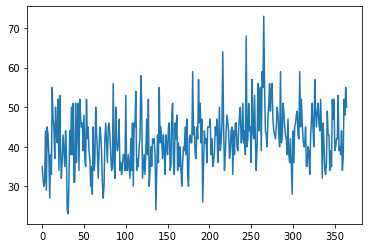

In [27]:
Dataviz_df['births'].plot()

 X axis is presenting indexes and Y axis birth counts.

In [16]:
Dataviz_df.set_index('Date',inplace = True)

In [17]:
Dataviz_df.head()

,births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [28]:
Dataviz_df.index = Dataviz_df['Date']

In [29]:
Dataviz_df.head()

,Date,births
Date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


<AxesSubplot:xlabel='Date'>

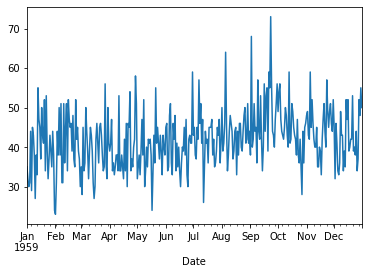

In [30]:
Dataviz_df['births'].plot()

# Zooming In

In [31]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['Date']>'1959-01-01') & (Dataviz_df['Date'] <'1959-01-10')].copy()

In [32]:
Dataviz_df2

,Date,births
Date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


<AxesSubplot:xlabel='Date'>

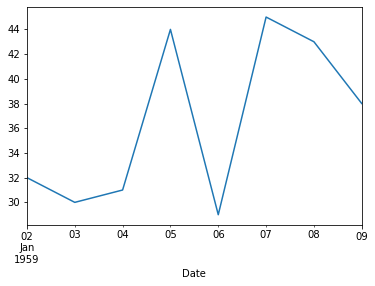

In [33]:
Dataviz_df2['births'].plot()

# Trendline

In [34]:
import seaborn as sns

In [40]:
df.rename({'Daily total births in California 1959': 'births'},axis=1,inplace = True)

In [41]:
df.head()

,Date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:ylabel='births'>

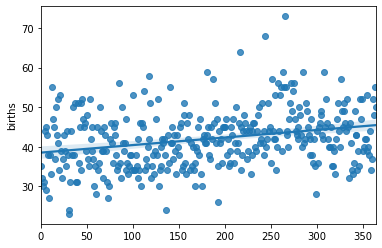

In [42]:
sns.regplot(x = df.index.values, y =df['births'])

regplot take numeric values, so here we have to take index valuesat x axis rather than date on x axis. 

<AxesSubplot:ylabel='births'>

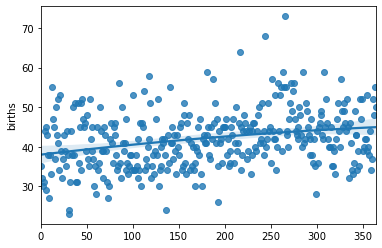

In [43]:
## For quardatic trend line
sns.regplot(x = df.index.values, y =df['births'],order =2)

<AxesSubplot:ylabel='births'>

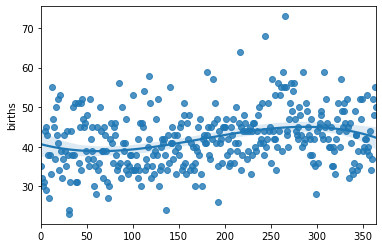

In [44]:
## For Cubic trend line
sns.regplot(x = df.index.values, y =df['births'],order =3)

<AxesSubplot:ylabel='births'>

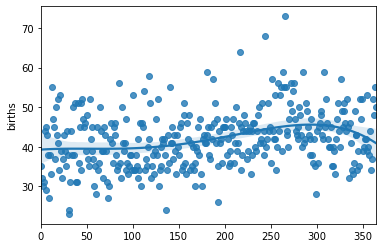

In [45]:
# For order 4
sns.regplot(x = df.index.values, y =df['births'],order =4)

In [6]:
beer_df = pd.read_csv('monthly-beer-production-in-austr.csv',parse_dates=[0])

In [47]:
beer_df.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [48]:
beer_df.dtypes

Month                      datetime64[ns]
Monthly beer production           float64
dtype: object

In [7]:
beer_df.rename({'Monthly beer production':'beer_prd'},inplace = True,axis = 1)

<AxesSubplot:>

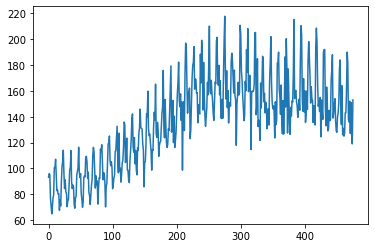

In [50]:
beer_df['beer_prd'].plot()

<AxesSubplot:ylabel='beer_prd'>

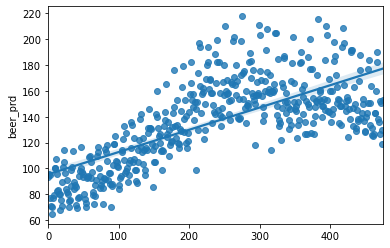

In [51]:
sns.regplot(x = beer_df.index.values, y =beer_df['beer_prd'])

# Removing Seasonality

In [52]:
beer_df.head()

,Month,beer_prd
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [53]:
beer_df['year'] = beer_df['Month'].dt.year

In [54]:
beer_df.head()

,Month,beer_prd,year
0,1956-01-01,93.2,1956
1,1956-02-01,96.0,1956
2,1956-03-01,95.2,1956
3,1956-04-01,77.1,1956
4,1956-05-01,70.9,1956


<AxesSubplot:xlabel='year'>

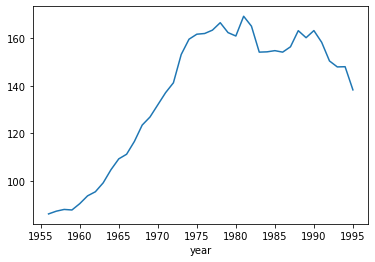

In [56]:
beer_df.groupby('year')['beer_prd'].mean().plot()

# Creating Lag Points

In [57]:
beer_df['lag1'] = beer_df['beer_prd'].shift(1)

In [58]:
beer_df.head()

,Month,beer_prd,year,lag1
0,1956-01-01,93.2,1956,NaN
1,1956-02-01,96.0,1956,93.2
2,1956-03-01,95.2,1956,96.0
3,1956-04-01,77.1,1956,95.2
4,1956-05-01,70.9,1956,77.1


<AxesSubplot:xlabel='lag1', ylabel='beer_prd'>

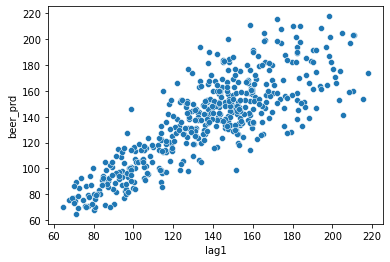

In [61]:
sns.scatterplot(x =beer_df['lag1'], y =beer_df['beer_prd'] )

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

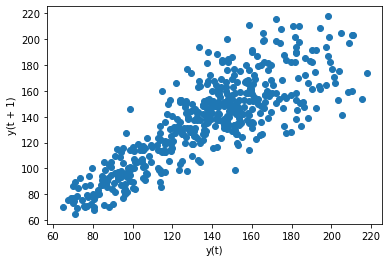

In [64]:
from pandas.plotting import lag_plot
lag_plot(beer_df['beer_prd'])

# AutoCorrelation Plots

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

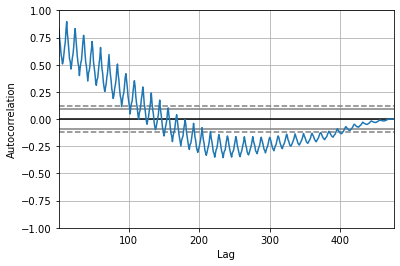

In [66]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(beer_df['beer_prd'])

# Decomposing Time Series

Additive Model
y(t) = Level +Trend +Seasonality+ Noise
Multiplicative Model
y(t) = Level * Trend * Seasaonality * Noise

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
beer_df.head()

,Month,beer_prd
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [9]:
beer_df.index = beer_df['Month']

In [10]:
result = seasonal_decompose(beer_df['beer_prd'],model = 'additive')

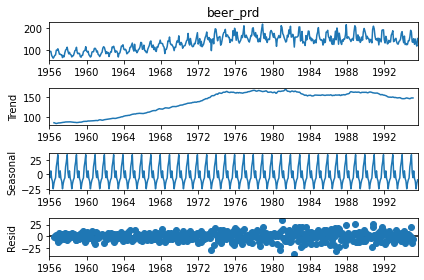

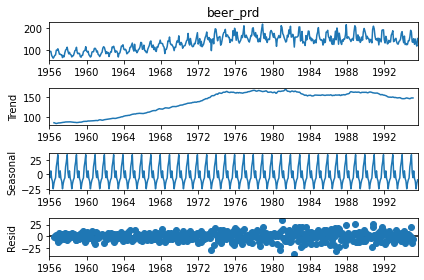

In [12]:
result.plot()

In [13]:
result2 = seasonal_decompose(beer_df['beer_prd'],model = 'multiplicative')

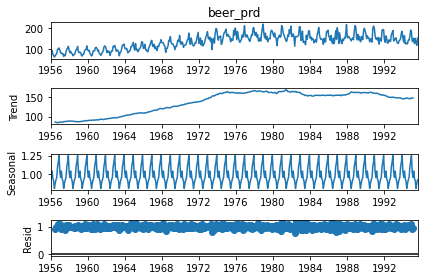

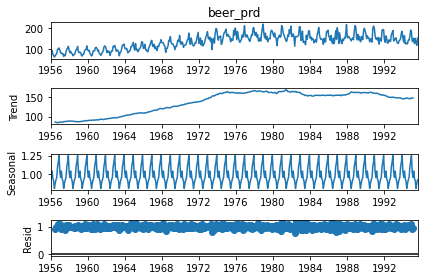

In [14]:
result2.plot()

# Differencing to remove Trend and Seasonality

In [15]:
beer_df['lag1'] = beer_df['beer_prd'].shift(1)

In [16]:
beer_df.head()

,Month,beer_prd,lag1
Month,,,
1956-01-01,1956-01-01,93.2,NaN
1956-02-01,1956-02-01,96.0,93.2
1956-03-01,1956-03-01,95.2,96.0
1956-04-01,1956-04-01,77.1,95.2
1956-05-01,1956-05-01,70.9,77.1


In [17]:
beer_df['beer_prd_diff1'] = beer_df['beer_prd'].diff(periods = 1)

In [18]:
beer_df.head()

,Month,beer_prd,lag1,beer_prd_diff1
Month,,,,
1956-01-01,1956-01-01,93.2,NaN,NaN
1956-02-01,1956-02-01,96.0,93.2,2.8
1956-03-01,1956-03-01,95.2,96.0,-0.8
1956-04-01,1956-04-01,77.1,95.2,-18.1
1956-05-01,1956-05-01,70.9,77.1,-6.2


In [19]:
result_b = seasonal_decompose(beer_df.iloc[1:,3],model = 'additive')

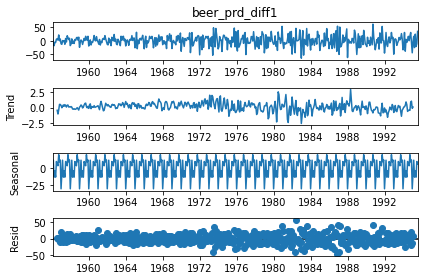

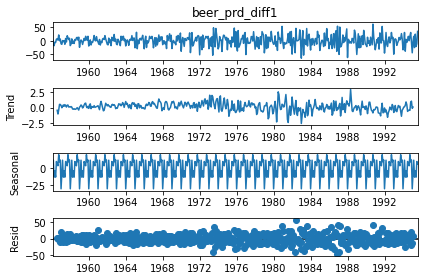

In [20]:
result_b.plot()

# Removing seasonality

In [21]:
beer_df['beer_prd_diff_12'] = beer_df['beer_prd_diff1'].diff(periods =12)

<AxesSubplot:xlabel='Month'>

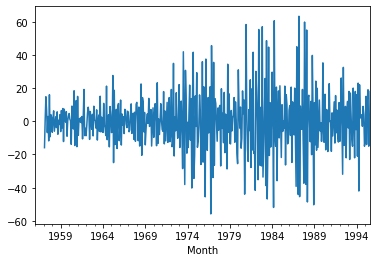

In [23]:
beer_df['beer_prd_diff_12'].plot()

In [26]:
result3 =seasonal_decompose(beer_df.iloc[13:,4],model = 'additive')

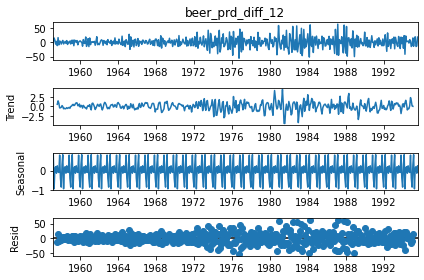

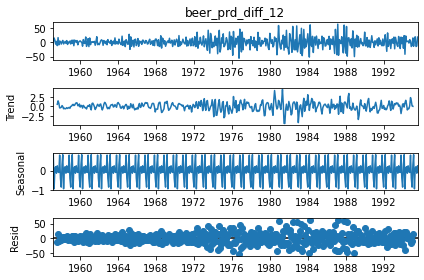

In [27]:
result3.plot()